# Import library

In [1]:
#Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV
from sklearn.decomposition import PCA
seed =45
% matplotlib inline
plt.style.use('fivethirtyeight')

# Import data set

In [2]:
#path = '../input/'
path = ''
train = pd.read_csv(path+'train.csv',na_values=-1)
test = pd.read_csv(path+'test.csv',na_values=-1)
print('Number rows and columns:',train.shape)
print('Number rows and columns:',test.shape)

Number rows and columns: (4209, 378)
Number rows and columns: (4209, 377)


# Explore data set

In [3]:
train.head(5)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


# Target varaiable

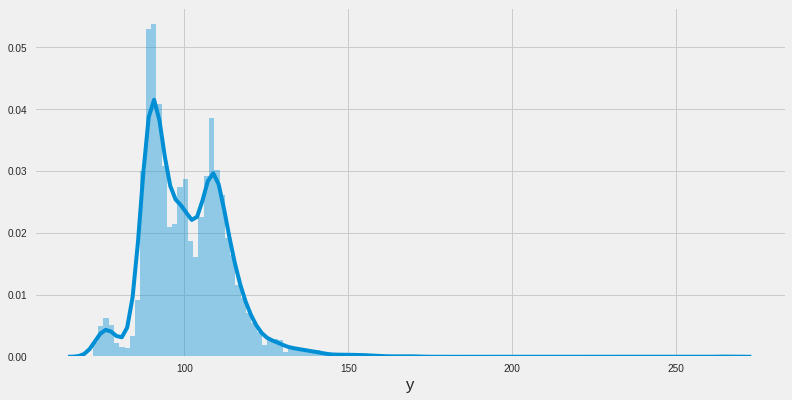

In [4]:
plt.figure(figsize=(12,6))
sns.distplot(train['y'],bins=120)
plt.xlabel('y')

The 'target' variable in imbalanced 

# CORELATION PLOT

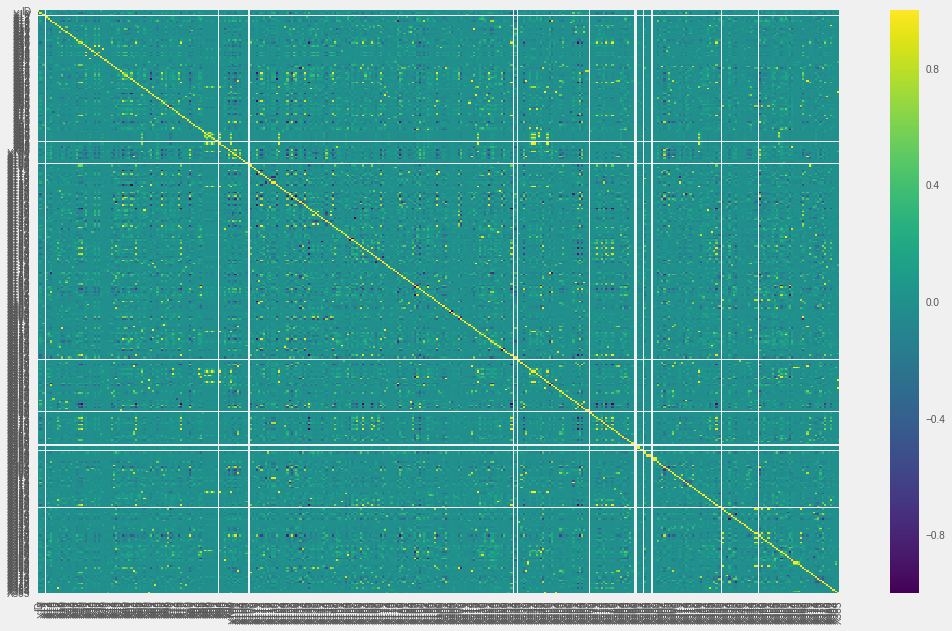

In [51]:
cor = train.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor,cmap='viridis')

# Missing value is data set

In [5]:
train.isnull().sum().sum()

0

In [6]:
test.isnull().sum().sum()

0

The data set is combined. The binary feature present in data set. Unique value in columns, 368 columns contains binary feature

In [3]:
train_len = train.shape[0]
df = pd.concat([train,test],axis=0)

In [4]:
bin_col = [c for c in df.columns if (df[c].nunique()==2)]
len(bin_col)

368

In [5]:
other_col = [c for c in df.columns if c not in bin_col]
other_col

['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'y']

In [6]:
df[other_col].nunique()

ID    8418
X0      53
X1      27
X2      50
X3       7
X4       4
X5      33
X6      12
X8      25
y     2545
dtype: int64

In [7]:
def category_type(df):
    col = df.columns
    for i in col:
        if (2< df[i].nunique() <=53):
            df[i] = df[i].astype('category')
category_type(df)

# Univariate analysis

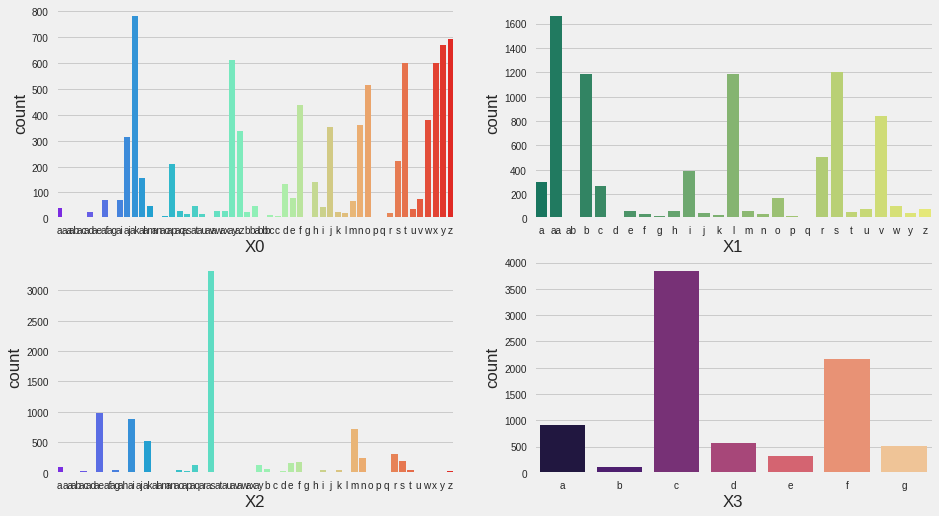

In [13]:
fig ,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(df['X0'],palette='rainbow',ax=ax1)
sns.countplot(df['X1'],palette='summer',ax=ax2)
sns.countplot(df['X2'],palette='rainbow',ax=ax3)
sns.countplot(df['X3'],palette='magma',ax=ax4)

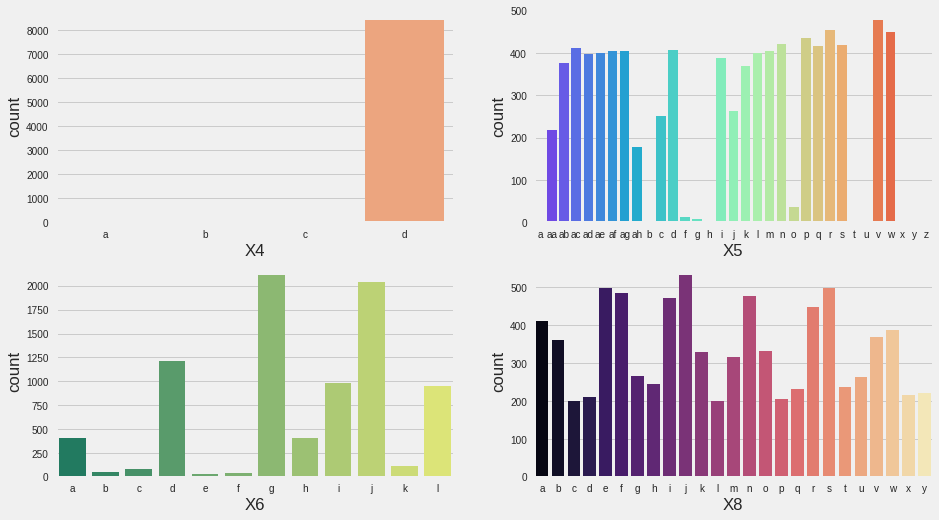

In [14]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(df['X4'],palette='magma',ax=ax1)
sns.countplot(df['X5'],palette='rainbow',ax=ax2)
sns.countplot(df['X6'],palette='summer',ax=ax3)
sns.countplot(df['X8'],palette='magma',ax=ax4)

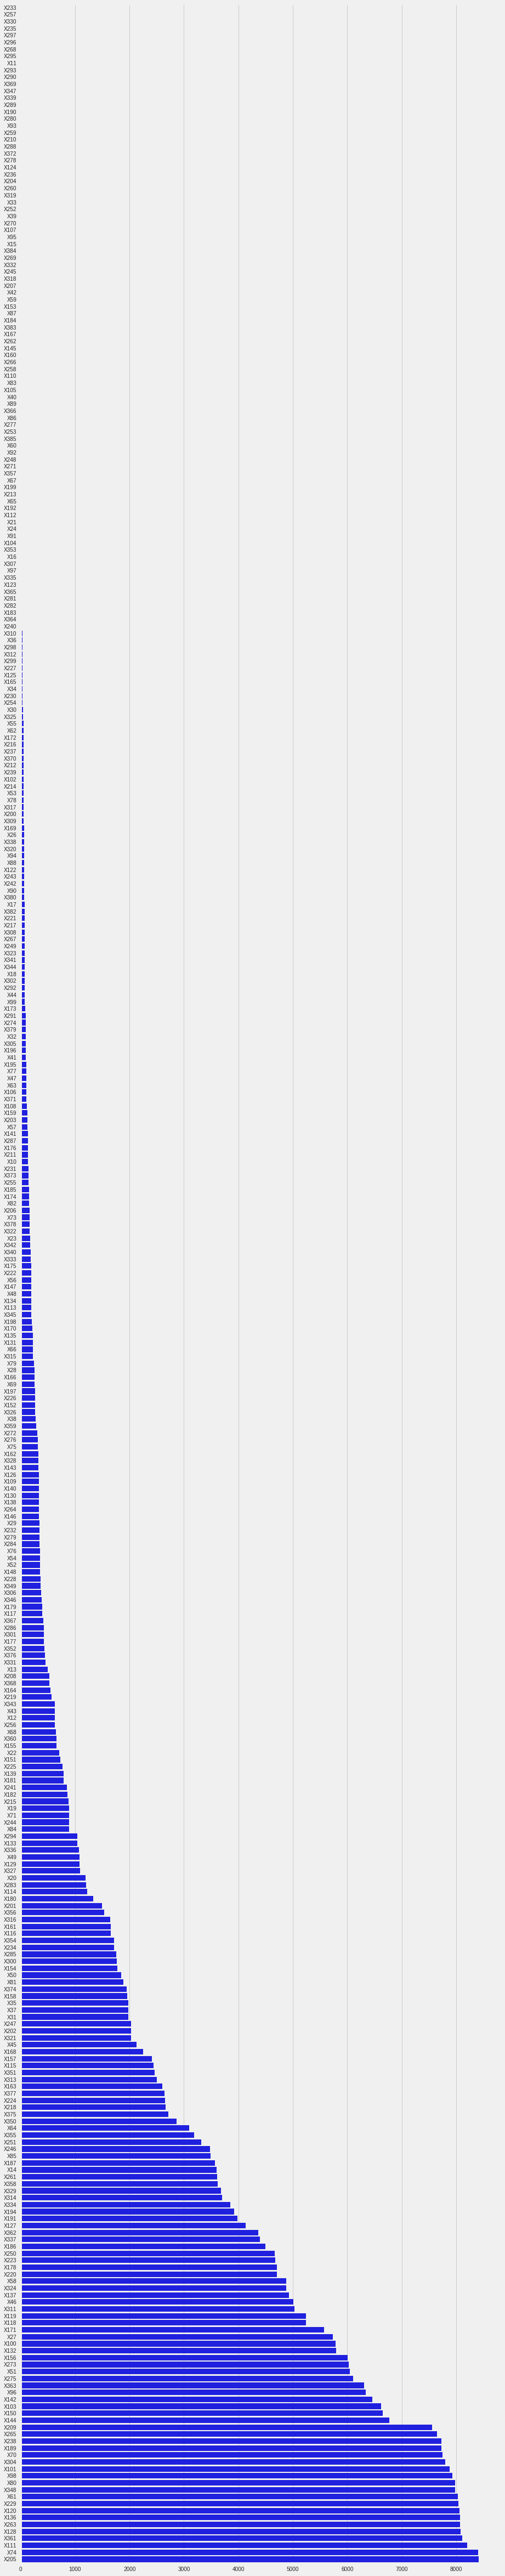

In [15]:
plt.figure(figsize=(14,80))
k = df[bin_col].sum().sort_values()
sns.barplot(k,k.index,orient='h',color='b')

# One Hot Encoding

In [8]:
def OHE(df,columns):
    print('Categorical features',len(columns))
    c2,c3 = [],{}
    for c in columns:
        c2.append(c)
        c3[c] = 'ohe_'+c
    df1 = pd.get_dummies(df,prefix=c3,columns=c2,drop_first=True)
    print('Size',df1.shape)
    return df1

In [9]:
col_ohe = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
df1 = OHE(df,col_ohe)

Categorical features 8
Size (8418, 573)


In [23]:
df1.head()

,ID,X10,X100,X101,X102,X103,X104,X105,X106,X107,...,ohe_X8_p,ohe_X8_q,ohe_X8_r,ohe_X8_s,ohe_X8_t,ohe_X8_u,ohe_X8_v,ohe_X8_w,ohe_X8_x,ohe_X8_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# PCA

In [25]:
pca = PCA(n_components=None,random_state=seed)
pca.fit(df1.drop(['y','ID'],axis=1))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=45,
  svd_solver='auto', tol=0.0, whiten=False)

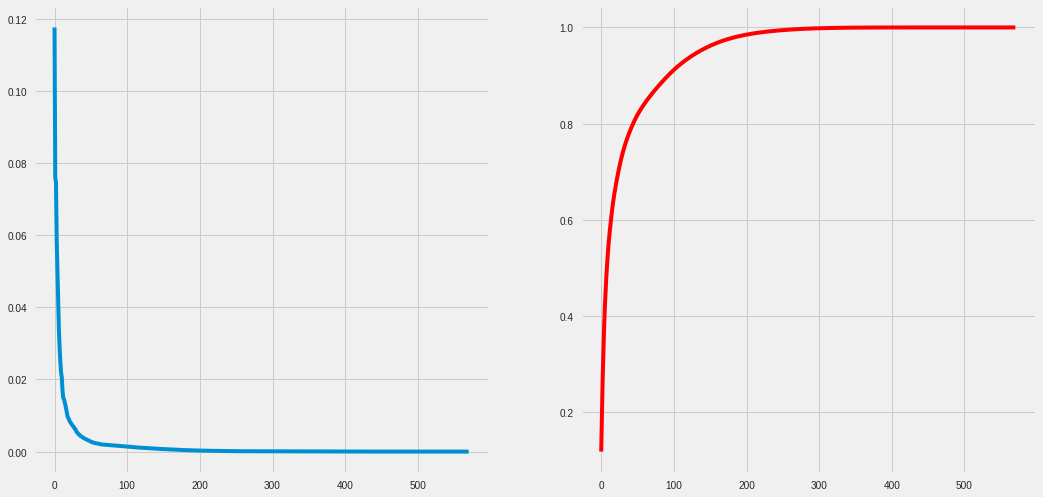

In [20]:
pca_var = pca.explained_variance_ratio_
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2, = ax.flatten()
ax1.plot(pca_var)
pca_var_cum = np.cumsum(pca_var)
ax2.plot(pca_var_cum,color='r')

In [10]:
pca = PCA(n_components=300,random_state=seed)
df_pca = pca.fit_transform(df1.drop(['y','ID'],axis=1))

# Split data set

In [11]:
X = df_pca[:train_len,]
y = df1[:train_len]['y']
x_test = df_pca[train_len:,]
X.shape,y.shape,x_test.shape

((4209, 300), (4209,), (4209, 300))

# Model

Logistic regression is used for modelling. The data set is split using Stratified Kfold. In each split model is created and predicted using that model. The final predicted value is average of all model. 

In [31]:
kf = StratifiedKFold(n_splits=3,random_state=seed,shuffle=True)
pred_test_full=0
cv_score=[]
i=1
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X[train_index], X[test_index]
    ytr,yvl = y[train_index], y[test_index]
    
    lr = LinearRegression()
    lr.fit(xtr, ytr)
    pred_test = lr.predict(xvl)
    score = lr.score(xvl,yvl)
    print('R square score',score)
    cv_score.append(score)
    pred_test_full += lr.predict(x_test)
    i+=1

/home/sudhir/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)



1 of kfold 3
R square score 0.527212020851

2 of kfold 3
R square score 0.545176904091

3 of kfold 3
R square score 0.496918819572


In [32]:
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score),'\n std',np.std(cv_score))

Cv [0.52721202085098029, 0.54517690409106911, 0.49691881957201733] 
Mean cv Score 0.523102581505 
 std 0.0199144218958


# Predict for unsen data set

In [191]:
y_pred = pred_test_full/3
submit = pd.DataFrame({'ID':test['ID'],'y':y_pred})
submit.to_csv('lr_benz.csv.gz',index=False,compression='gzip') 
#submit.to_csv('lr_porto.csv',index=False) 

In [187]:
submit.head()

,ID,y
0,1,79.435433
1,2,93.718109
2,3,82.445639
3,4,77.847650
4,5,112.145407


# Thank you for visiting

In [33]:
# ANN

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


Intializing the ANN

In [26]:
#random intialization
regressor = Sequential()
#input and 1 hidden layer
regressor.add(Dense(units = 600, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 300)) 
regressor.add(Dense(units = 600, kernel_initializer = 'uniform', activation ='relu'))
regressor.add(Dense(units = 300, kernel_initializer = 'uniform', activation ='relu'))
#regressor.add(Dense(units = 200, kernel_initializer = 'uniform', activation ='sigmoid'))
#regressor.add(Dense(units = 100, kernel_initializer = 'uniform', activation ='relu'))

#output layer
regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))

#compile ANN
regressor.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

regressor.fit(X,y,batch_size=10,epochs=10)

Epoch 1/10
4209/4209 [==============================] - 7s - loss: 373.2924 - acc: 7.1276e-04     
Epoch 2/10
4209/4209 [==============================] - 7s - loss: 79.6337 - acc: 0.0014     
Epoch 3/10
4209/4209 [==============================] - 8s - loss: 82.2257 - acc: 4.7517e-04     
Epoch 4/10
4209/4209 [==============================] - 8s - loss: 75.8639 - acc: 0.0000e+00     
Epoch 5/10
4209/4209 [==============================] - 8s - loss: 76.0989 - acc: 9.5034e-04     
Epoch 6/10
4209/4209 [==============================] - 11s - loss: 76.6345 - acc: 4.7517e-04    
Epoch 7/10
4209/4209 [==============================] - 10s - loss: 78.2189 - acc: 9.5034e-04    
Epoch 8/10
4209/4209 [==============================] - 10s - loss: 79.1049 - acc: 9.5034e-04    
Epoch 9/10
4209/4209 [==============================] - 10s - loss: 76.9101 - acc: 7.1276e-04    
Epoch 10/10
4209/4209 [==============================] - 10s - loss: 79.2784 - acc: 4.7517e-04    


In [27]:
y_pred = regressor.predict(x_test)

In [29]:
y_pred[:5]

array([[  79.54143524],
       [  91.65331268],
       [  81.74877167],
       [  76.27853394],
       [ 110.35642242]], dtype=float32)